In [1]:
### in this task missing numerical values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

In [4]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

#### Question 1 - solution

In [5]:
result = [('price', 'numerical-continuous'), ('pages', 'numerical-discrete'), ('avg_reviews','numerical-continuous'),('n_reviews','numerical-discrete'),('language','categorical-nominal')]
pd.DataFrame(result)

,0,1
0,price,numerical-continuous
1,pages,numerical-discrete
2,avg_reviews,numerical-continuous
3,n_reviews,numerical-discrete
4,language,categorical-nominal


#### Question 2

In [6]:
### compute Pearson's correlation between pages and weight in the data
### (you can use the built-in Series.corr() function for that purpose)

#### Question 2 - solution

In [7]:
# Convert 'weight' column to pounds
def convert_to_pounds(weight):
    if isinstance(weight, float):  # If weight is already converted
        return weight
    elif 'pounds' in weight:
        return float(weight.split()[0])
    elif 'ounces' in weight:
        return float(weight.split()[0]) / 16.0
    else:
        return None

df['weight'] = df['weight'].apply(convert_to_pounds)

# Fill null values with mean for pages and weight columns
mean_pages = df['pages'].mean()
mean_weight = df['weight'].mean()

df['pages'].fillna(mean_pages, inplace=True)
df['weight'].fillna(mean_weight, inplace=True)

correlation = df['pages'].corr(df['weight'])

pd.DataFrame([("Pearson's correlation between pages and weight:", correlation)])

,0,1
0,Pearson's correlation between pages and weight:,0.569515


#### Question 3

In [8]:
### show a scatter plot of pages (x) and weight (y)
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

#### Question 3 - solution

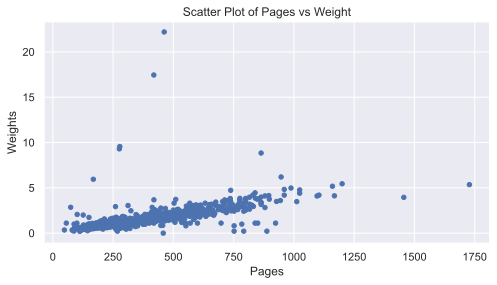

In [9]:
df.plot(kind='scatter', x='pages', y='weight')
plt.title('Scatter Plot of Pages vs Weight')
plt.xlabel('Pages')
plt.ylabel('Weights')
plt.show()

#### Question 4

In [10]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

#### Question 4 - solution

In [11]:
# Calculate volume base on book dimensions
def calculate_volume(book_dimensions):
    if pd.notna(book_dimensions):
        dimensions = book_dimensions.split(' inches')[0]
        dimensions = dimensions.split(' x ')
        return float(dimensions[0]) * float(dimensions[1]) * float(dimensions[2])
    else:
        return None
       

df['volume'] = df['dimensions'].apply(calculate_volume)

# Fill null values with mean for volume and price columns
mean_volume = df['volume'].mean()
median_price = df['price'].mean()

df['volume'].fillna(mean_volume, inplace=True)
df['price'].fillna(median_price, inplace=True)

correlation = df['volume'].corr(df['price'])

pd.DataFrame([("Pearson's correlation between a book's volume (inferred by its dimensions) and price", correlation)])

,0,1
0,Pearson's correlation between a book's volume ...,0.41851


#### Question 5

In [12]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

#### Question 5 - solution

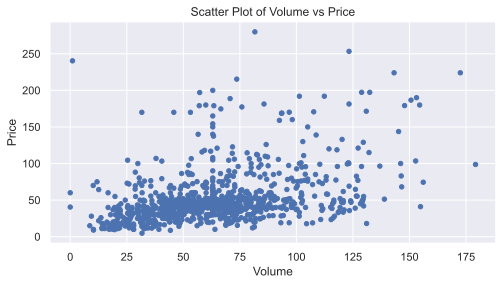

In [13]:
df.plot(kind='scatter', x='volume', y='price')
plt.title('Scatter Plot of Volume vs Price')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

#### Question 6

In [14]:
### inspect book titles carefully - they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories

#### Question 6 - solution

In [15]:
# Given categories
keyphrases = ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 'deep learning', 'natural language processing']

# Initialize a dictionary to store the count of books for each category
category_counts = {keyphrase: 0 for keyphrase in keyphrases}
# Initialize a counter to store the count of books that belongs to at least one category
total_books_belongs_to_category = 0

# Iterate over the titles and count the books for each category
for title in df['title']:
    book_belong_to_category = False
    for keyphrase in keyphrases:
        if keyphrase in title.lower():
            book_belong_to_category = True
            category_counts[keyphrase] += 1
    if book_belong_to_category:
        total_books_belongs_to_category += 1
            
# Display the counts in a DataFrame
category_df = pd.DataFrame({'Category': list(category_counts.keys()), 'Count': list(category_counts.values())})

# Add a row for the total count
category_df.loc[len(category_df)] = ['total', total_books_belongs_to_category]

category_df

,Category,Count
0,data science,111
1,data analytics,28
2,data engineering,7
3,machine learning,179
4,statistics,128
5,deep learning,138
6,natural language processing,13
7,total,528


#### Question 7

In [16]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it

#### Question 7 - solution

In [17]:
# Sort the DataFrame by the count of books in descending order
category_df = category_df.sort_values(by='Count', ascending=False)

# Drop the 'Total' row
category_df = category_df[category_df['Category'] != 'total']

category_df

,Category,Count
3,machine learning,179
5,deep learning,138
4,statistics,128
0,data science,111
1,data analytics,28
6,natural language processing,13
2,data engineering,7


#### Question 8

In [18]:
### sample 10000 values from N~(10, 5)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (2.5, 17.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (2.5, 17.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

#### Question 8 - solution

In [19]:
import numpy as np
from statistics import NormalDist

# Generate 10,000 samples from N~(10, 5)
samples = np.random.normal(10, 5, 10000)

# Calculate z-scores for the given range
z_lower = (2.5 - 10) / 5
z_upper = (17.5 - 10) / 5

# Calculate the portion using the CDF
calculated_portion = NormalDist().cdf(z_upper) - NormalDist().cdf(z_lower)

# Calculate empirical portion of the distribution in the range (2.5, 17.5)
empirical_portion = np.sum((samples > 2.5) & (samples < 17.5)) / len(samples)

pd.DataFrame([('Calculated portion using z-table', calculated_portion), ('Empirical portion using sampled values', empirical_portion)])

,0,1
0,Calculated portion using z-table,0.866386
1,Empirical portion using sampled values,0.869800


#### Question 9

In [20]:
### compute confidence interval of 95% for the true population mean of a book price on Amazon
### report left and right boundaries

#### Question 9 - solution

In [21]:
def confidence_interval(data, alpha):
    # Calculate mean, standard deviation, and sample size
    mean, std, n = data.mean(), data.std(), len(data)
    
    # Calculate the z-score for the given confidence level (two-tailed)
    z = NormalDist().inv_cdf(1 - alpha / 2.0)
    
    # Calculate the left and right boundaries of the confidence interval
    left, right = mean - z * std / (n ** 0.5), mean + z * std / (n ** 0.5)
    
    return left, right

left, right = confidence_interval(df['price'], 0.05)
pd.DataFrame([('Left boundary', left), ('Right boundary', right)])

,0,1
0,Left boundary,49.774292
1,Right boundary,54.432763


#### Question 10

In [22]:
### can one say with 85% confidence that the true population mean of a book price resides within the [50.0, 53.0] interval?
### show your computations, and print your answer: yes or no

#### Question 10 - solution

In [23]:
 # Calculate the confidence interval for 85% confidence level
confidence_level = 0.85
left, right = confidence_interval(df['price'], 1 - confidence_level)

# Check if the interval [50.0, 53.0] falls within the confidence interval
interval_lower_bound = 50.0
interval_upper_bound = 53.0

if left <= interval_lower_bound and right >= interval_upper_bound:
    answer = 'yes'
else:
    answer = 'no'

pd.DataFrame([('Left boundary', left), ('Right boundary', right), ('Answer', answer)])

,0,1
0,Left boundary,50.392778
1,Right boundary,53.814278
2,Answer,no
